[nan nan]
nan
A_12= nan
A_21= nan
loss= nan
Checking model vs. experimental data (experimental p, modeled p, difference
p experimental= 28.1 & p model= nan difference nan
p experimental= 34.4 & p model= nan difference nan
p experimental= 36.7 & p model= nan difference nan
p experimental= 36.9 & p model= nan difference nan
p experimental= 36.8 & p model= nan difference nan
p experimental= 36.7 & p model= nan difference nan
p experimental= 36.5 & p model= nan difference nan
p experimental= 35.4 & p model= nan difference nan
p experimental= 32.9 & p model= nan difference nan
p experimental= 27.7 & p model= nan difference nan
p experimental= 17.5 & p model= nan difference nan


Text(0.5, 1.0, 'Vapor-Liquid Equilibria - Experimental Vs. OLS Model Fit ')

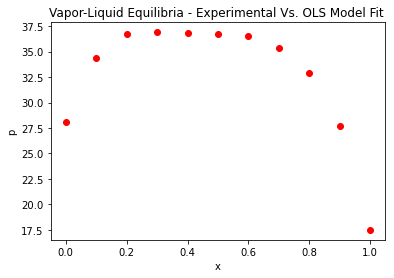

In [3]:
import numpy as np
import math as m
import torch as t
from torch.autograd import Variable
from line_search_bt import *
import matplotlib.pyplot as plt


a_water=np.array([8.07131,1730.63,233.426])
a_dioxane=np.array([7.43155,1554.679,240.337])


def p_specific(a,T):
   return 10**(a[0]-((a[1])/(T+a[2])))

x1=np.array([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
x2=1-x1

p=np.array([28.1,34.4,36.7,36.9,36.8,36.7,36.5,35.4,32.9,27.7,17.5])

def func(x):
   for i in range(0,len(x1)):
       func=+(((x1[i]*pwater*t.exp(x[0]*((x[1]*x2[i])/(x[0]*x1[i]+x[1]*x2[i]))**2)) + (x2[i]*pdioxane*t.exp( z[1]*((z[0]*x1[i])/(z[0]*x1[i]+z[1]*x2[i]))**2))) - p[i])**2
   return func

T=20



pwater=((p_specific(a_water,T)))
pdioxane=((p_specific(a_dioxane,T)))

x = Variable(t.tensor([1.0, 1.0]), requires_grad=True)

# step size 
a = 1
#create a check variable
pcheck_str=[]

# gradient descent
for i in range(100): 
    for i in range(0,len(x1)):
        
        loss = (((x1[i]*pwater*t.exp(x[0]*((x[1]*x2[i])/(x[0]*x1[i]+x[1]*x2[i]))**2)) + (x2[i]*pdioxane*t.exp( x[1]*((x[0]*x1[i])/(x[0]*x1[i]+x[1]*x2[i]))**2))) - p[i])**2
    
        loss.backward()

    x.grad.numpy()
    
    with t.no_grad():
        l=x.data
        grad=x.grad
        direction=-1*x.grad
   
        a=line_search_bt(l,func,grad,a,.5,.5,direction)
        x -= a * x.grad
        
        # clear gradient
        x.grad.zero_()

sol=x.data.numpy()
print(x.data.numpy())
print(loss.data.numpy())

print('A_12=',sol[0])
print('A_21=',sol[1])
print('loss=',loss.data.numpy())


print('Checking model vs. experimental data (experimental p, modeled p, difference')
for i in range(0,len(p)):
   pcheck = ((x1[i]*pwater*m.exp(x[0]*((x[1]*x2[i])/(x[0]*x1[i]+x[1]*x2[i]))**2)) + (x2[i]*pdioxane*m.exp( x[1]*((x[0]*x1[i])/(x[0]*x1[i]+x[1]*x2[i]))**2)))
   pcheck_str.append(pcheck)
   print("p experimental=",p[i], "&", "p model=",pcheck, "difference" , p[i]-pcheck)



plt.plot(x1,pcheck_str,x1,p,'ro')
plt.xlabel('x')
plt.ylabel('p')
plt.title('Vapor-Liquid Equilibria - Experimental Vs. OLS Model Fit ')
